# Group Assignment 2: Cross Entropy

## Goal
- Language Modeling에 따른 Cross Entropy 구현
- N-gram Generation, Word Counting, Cleaning Revisit
- Smoothing (Add-1) implementation

### Entropy

In Information Theory, entropy (denoted $H(X)$) of a random variable X is the expected log probabiltiy:

\begin{equation}
    H(X) = - \sum P(x)log_2 P(x)
\end{equation}

and is a measure of uncertainty. 


### Defn: Cross Entropy

The cross entropy, H(p,m), of a true distribution **p** and a model distribution **m** is defined as:

\begin{equation}
    H(p,m) = - \sum_{x} p(x) log_2 m(x)
\end{equation}

The lower the cross entropy is the closer it is to the true distribution.

## Contents
- Assignment1에서 사용했던 NIRW1900000011.json 은 전자신문 뉴스기사이다. (training data로 사용)
- NWRW1800000045.json 은 동아일보 뉴스 기사이다. (test data로 사용)
- 국립국어원의 웹 코퍼스 (WEB) 중의 하나인 EBRW1908000138.json (첨부)은 블로그 자료이다. (test data로 사용)
- training data에서 학습한 한글 자소/글자(음절)/어절 별 unigram, Bigram, trigram 모델이 같은 신문기사와 웹자료에 얼마나 잘 부합하는지를 교차 엔트로피로 살펴봄
- 세 데이터에서 "form"에 해당하는 부분만을 각각 추출하여, 한글 글자들만 남긴 후 (스페이스도 고려) unigram, bigram, trigram 구성을 만들고 빈도를 구함

### 1. 자소별 모델

* 한글 자모 :
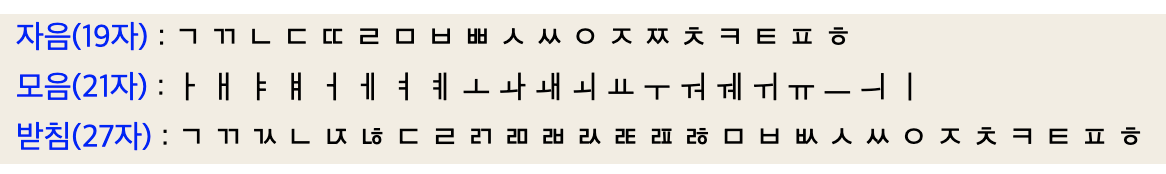



* 초성과 받침의 겹치는 자음은 구분하지 않고 같은 자소로 파악. 따라서 총 51자소의 연쇄로 파악
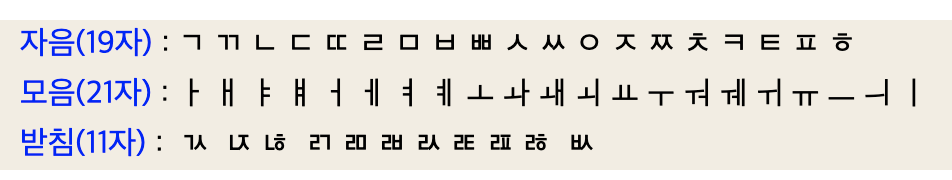

* 총 51자소에 대해 실제 나타난 빈도를 바탕으로 엔트로피는 다음과 같이 계산됨 (유니그램)

H(X) = -p(ㄱ) log2 p(ㄱ) -p(ㄴ) log2 p(ㄴ) ...- p(ㅎ) log2 p(ㅎ)

*바이그램의 경우는 두 자소끼리, 트라이그램의 경우는 세 자소끼리 연쇄의 엔트로피를 구함



### 2. 글자(음절)별 모델

- 한글은 논리적으로 초*중*종 결합인 19 x 21 x 28(받침없는 Filler포함) = 11,172자의 글자(음절) 표현 가능
* 총 11,172 가능한 음절 중 실제로 코퍼스에 나타난 각 음절에 대해  엔트로피를 다음과 같이 계산 (유니그램)

H(X) = -p(가) log2 p(가) -p(각) log2 p(각) ...- p(힣) log2 p(힣)

* 바이그램은 두 글자의 연쇄, 트라이그램은 세글짜의 연쇄의 엔트로피를 구함

### 3. 어절별 모델
- 어절은 한글의 글자가 결합되고 스페이스에 의해 분리됨
- 스페이스에 의해 분리된 어절별 유니그램/바이그램/트라이그램을 구성하고 각 구성에 대한 엔트로피를 구함

H(X) = -p(어절은)log(어절은)-p(한글의)log(한글의)...

H(X) = -p(어절은한글의)log(어절은한글의)-p(한글의글자가)log(한글의글자가)...

H(X) = -p(어절은한글의글자가)log(어절은한글의글자가)-p(한글의글자가결합되고)log(한글의글자가결합되고)...

### 4. Cross Entropy
- 트레이닝 코퍼스에서 학습한 모델이 각각 테스트 데이터에 얼마나 부합하는지를 교차엔트로피를 계산하고 그 차이를 보이는 다음의 표를 출력하라.
Difference: H(P,m) - H(p)

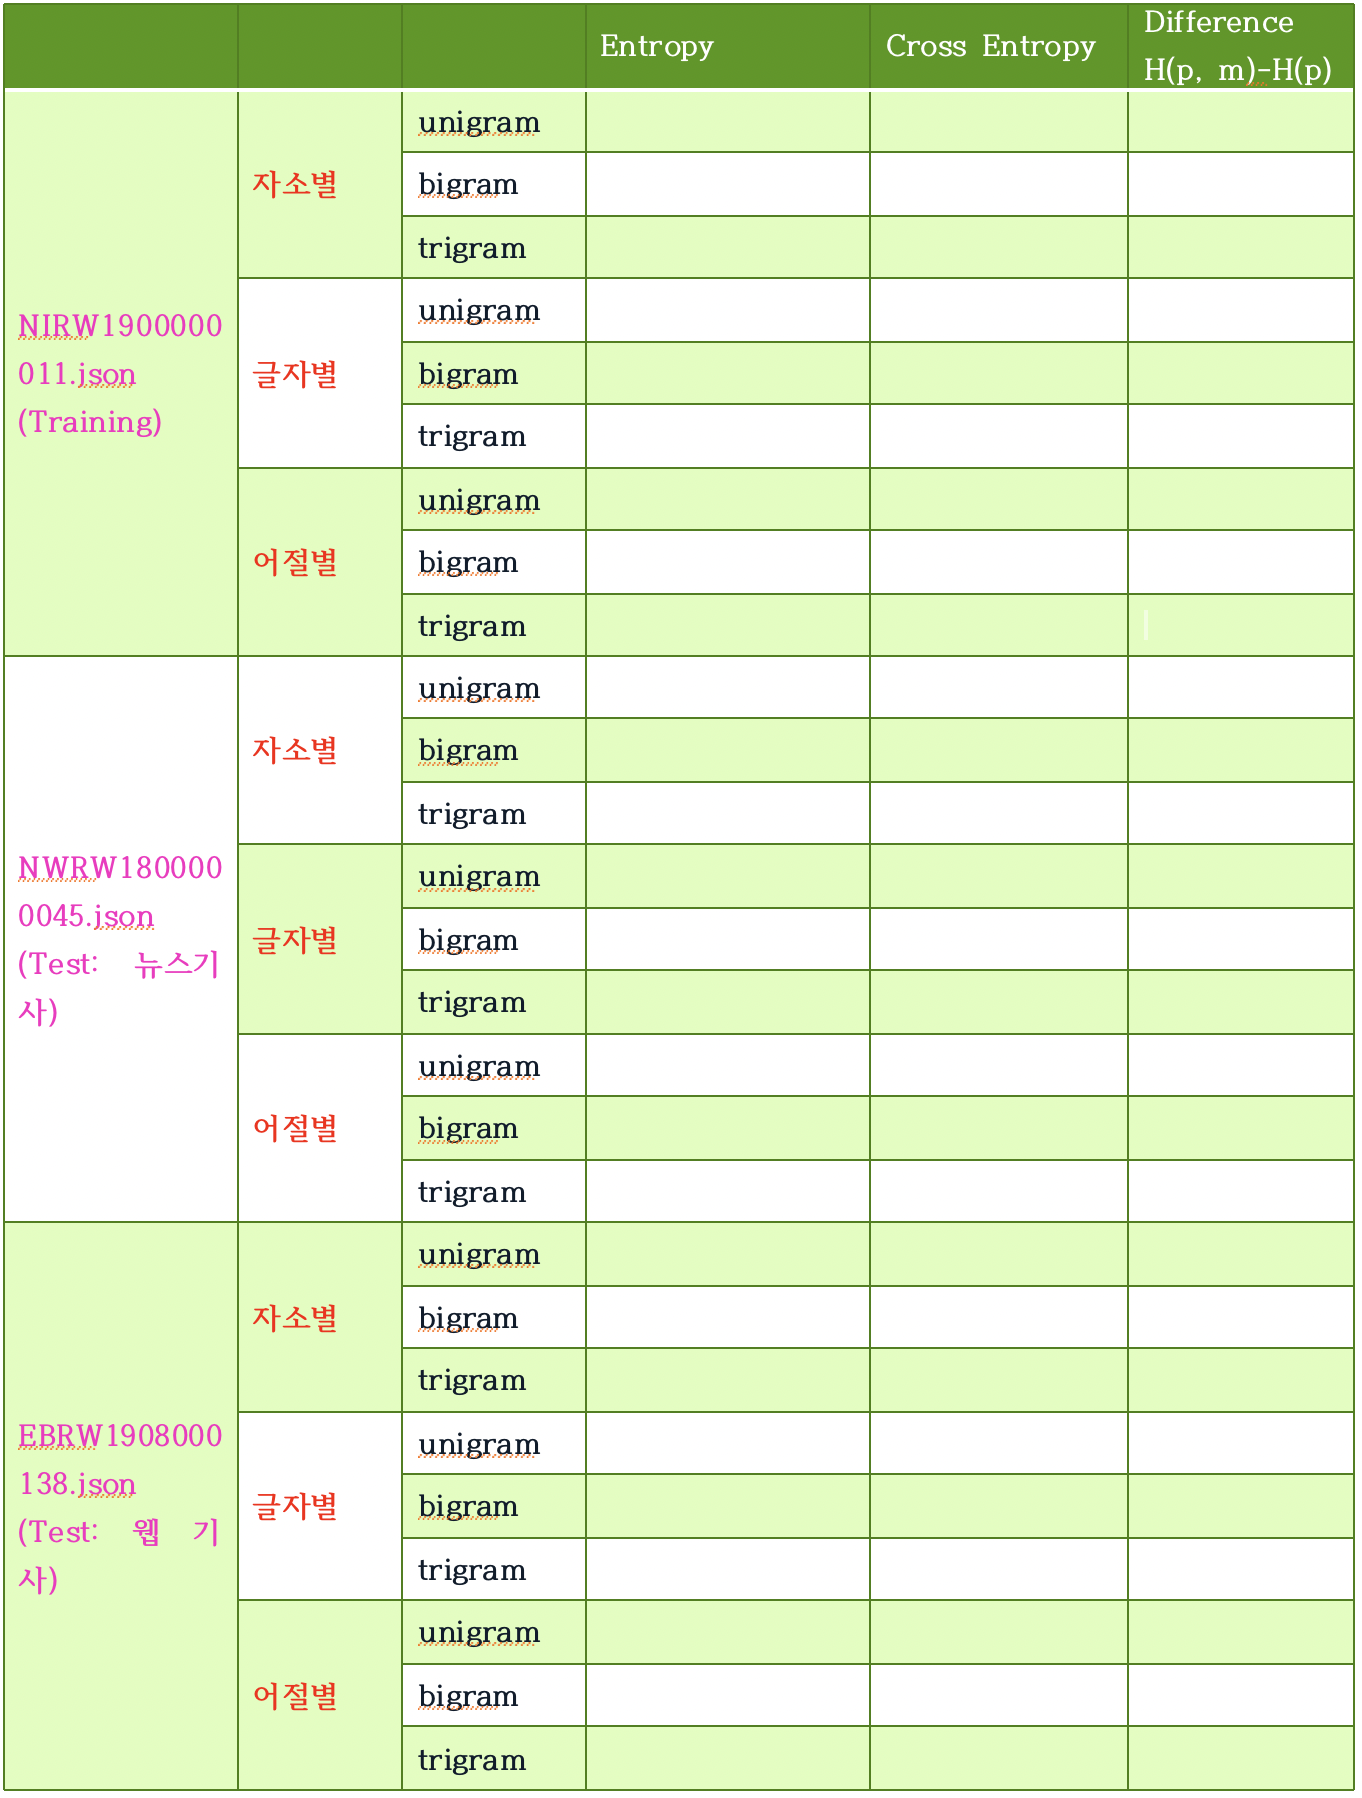

- training 코퍼스에서는 entropy와 cross entropy는 같고 따라서 그 차이는 0이다
- 코퍼스에서 테스트 하기 위한 테스트 코퍼스의 교차엔트로피는 각 모델의 확률을 구하고 이를 교차 엔트로피 공식에 따라 구하면 되는데, **이 경우 P(x)는 이 test 코퍼스의 자소별/글자별/어절별 unigram/bigram/trigram의 확률이고 모델의 확률인 logp(m)은 training 코퍼스인 코퍼스에서 구해진 각 모델의 확률이다.** 각 글자별로 이를 다 곱해서 더 하면 교차엔트로피가 구해진다. 즉 training테스트에서 설정한 언어모델이 test 코퍼스에 더 부합할수록 test에서의 각 구성의 확률이 training의 해당 확률에 근접하게 될 것임. 완벽한 경우 두 모델이 일치한다면, 즉 교차엔트로피가 실제 엔트로피와 동일하게 되면 그 차이는 0이 된다. 따라서 H(P,m) - H(p)의 차이가 작을수록 더 좋은 모델이 된다. 
- 이 경우 training 코퍼스에 없는 n-gram 구성이  test 코퍼스에 있을 경우 문제가 되니 이 구성의 확률을 얻기 위해 ADD-1을 사용해서 smoothing하라.
(힌트: training 데이터의 각 n-gram모델의 구성과 test-data의 n-gram모델의 구성을 비교하여 빠져 있는 구성을 보충하고 add-1을 사용해서 확률을 구함)

## General
- 마감: 10월 7일 목요일 오후 12시!
- 이 노트북 화일에 이름을 변경하여 작업하고 제출. 제출시 화일명을 Assignment2_[DS또는 CL]_학과_이름.ipynb
- 화일에 각 조원 이름 명시
- 코드, 또는 셀 마다 자세한 설명 요함

# n-gram 만들기
---
## 전처리
* 자소, 음절별

    문제에서 '한글과 띄어쓰기' 만을 고려하라고 한 만큼, (1) 모든 데이터를 자소, 음절로 변환하고 (2) 각 자소, 음절이 한글이거나 띄어쓰기가 아닌 데이터는 모두 버렸다. 
    
* 어절별

    어절별 n-gram 에 대해서는 (1) 모든 데이터를 먼저 띄어쓰기를 기준으로 분할하고 (2) 1에서 추출한 각 어절에서 한글을 제외한 문자열은 모두 버렸다. 예를 들어, '삼성SDS의 주가는' 이라는 문장이 있다면, '삼성의', '주가는' 이 유니그램으로 추출된다.
    
## n-gram 구성
* unigram

    unigram 은 기존의 데이터를 단순히 분할하는 것으로 구성할 수 있었다.
    
* bigram

    bigram 의 경우 

문제에서 '한글과 띄어쓰기' 만을 고려하라고 한 만

In [8]:
'''useful functions'''
def extract_news_from_json(news_json):
    news_document = news_json['document']
    news_list = []
    
    for idx in range(len(news_document)):
        news = news_document[idx]
        for par_idx in range(len(news['paragraph'])):
            paragraph = news['paragraph'][par_idx]
            news_list.append(paragraph['form'])
        
    return (news_list)

In [11]:
# 파일을 불러들어와 json파일을 파싱하여 필요한 텍스트를 추출
import json

with open('NIRW1900000011.json', 'r', encoding = 'utf-8') as data_json:
    training_json = json.load(data_json)
    
with open('NWRW1800000045.json', 'r', encoding = 'utf-8') as data_json:
    test1_json = json.load(data_json)
    
with open('EBRW1908000138.json', 'r', encoding = 'utf-8') as data_json:
    test2_json = json.load(data_json)
    
training_news_list = extract_news_from_json(training_json)
test1_news_list = extract_news_from_json(test1_json)
test2_news_list = extract_news_from_json(test2_json)

In [46]:
import re

# 한글과 띄어쓰기만 남기고 전부 버리는 함수
def extract_hangul_from_news(news_list):
    news_hangul_list = []
    hangulAndSpace = '[가-힣 ]'
    
    for news in news_list:
        news_hangul = ''.join(re.findall(hangulAndSpace, news))
        news_hangul_list.append(news_hangul)

    return (news_hangul_list)

training_news_hangul_list = extract_hangul_from_news(training_news_list)
test1_news_hangul_list    = extract_hangul_from_news(test1_news_list)
test2_news_hangul_list    = extract_hangul_from_news(test2_news_list)

In [48]:
# 전처리 결과 확인 #!# there are some not expected concat of segment.
i = 1
print(training_news_list[i])
print(training_news_hangul_list[i])

“위기는 한시적이다. 위기 이후 세계의 질서, 한국 위상이 어떻게 될지 염두에 두고 준비해야 한다.”　이명박 대통령이 지난해 12월 10일 원로들과의 오찬에서 강조한 위기론이다. 위기 속에서 새 시장을 개척하고 남들이 다 어려울 때 전력을 다해 새 기술을 개발하면 결과적으로 새로운 길을 모색할 수 있다는 것이다.
위기는 한시적이다 위기 이후 세계의 질서 한국 위상이 어떻게 될지 염두에 두고 준비해야 한다이명박 대통령이 지난해 월 일 원로들과의 오찬에서 강조한 위기론이다 위기 속에서 새 시장을 개척하고 남들이 다 어려울 때 전력을 다해 새 기술을 개발하면 결과적으로 새로운 길을 모색할 수 있다는 것이다


In [98]:
from jamo import h2j, j2hcj
from unicode import join_jamos
import collections

import numpy as np

from itertools import cycle  # for roundrobin algorithm
from itertools import islice # for roundrobin algorithm



###########
# unigram #
###########
def get_unigram(news_hangul_list):
    unigram_jm = []
    unigram_syllable = []
    unigram_segment  = []
    
    for news_hangul in news_hangul_list:
        # jamo unigram
        news_hangul_jm = j2hcj(h2j(news_hangul))
        uni_jm = list(news_hangul_jm)
        uni_jm.insert(0, '<s/') # insert start sign
        uni_jm.append('/s>')    # insert stop sign
        
        unigram_jm += uni_jm
        
        # syllable unigram
        uni_syllable = list(news_hangul_jm)
        uni_syllable.insert(0, '<s/') # insert start sign
        uni_syllable.append('/s>')    # insert stop sign
        
        unigram += uni_syllable
        
        # segment unigram
        uni_segment = re.split(' ', news_hangul)
        uni_segment.insert(0, '<s/') # insert start sign
        uni_segment.append('/s>')    # insert stop sign
        
        unigram_segment += uni_segment
            
            
    unigram = {jm : unigram_jm, syllable : unigram_syllable, segment : unigram_segment}
    return (unigram)

# syllable unigram
def unigram_syllable(news_hangul_list):
    unigram = []
    
    for news_hangul in news_hangul_list:
        uni_syllable = list(news_hangul_jm)
        uni_syllable.insert(0, '<s/') # insert start sign
        uni_syllable.append('/s>')    # insert stop sign
        
        unigram += uni_syllable

    return (unigram)

# segment unigram
def unigram_segment(news_hangul_list):
    unigram = []
    
    for news_hangul in news_hangul_list:
        uni_jm = re.split(' ', news_hangul)
        uni_jm.insert(0, '<s/') # insert start sign
        uni_jm.append('/s>')    # insert stop sign
        
        unigram += uni_jm

    return (unigram)

##########
# bigram #
##########

def roundrobin(*iterables):
    "roundrobin('ABC', 'D', 'EF') --> A D E B F C"
    # Recipe credited to George Sakkis
    pending = len(iterables)
    nexts = cycle(iter(it).next for it in iterables)
    while pending:
        try:
            for next in nexts:
                yield next()
        except StopIteration:
            pending -= 1
            nexts = cycle(islice(nexts, pending))
            

            

# convert ngram to probabilistic language model
def ngram2prob(ngram_list):
    ngram_dict = dict(collections.Counter(ngram_list))
    num_ngram = sum(ngram_dict.values())
    
    ngram_prob = {k: np.log(v/num_ngram) for k, v in ngram_dict.items()}
    return (ngram_prob)

In [104]:
import itertools
a = np.linspace(0, 1, 10)
b = np.linspace(1, 2, 10)
itertools.roundrobin(a, b)

ModuleNotFoundError: No module named 'roundrobin'

In [99]:
%%time

# create n-gram
training_unigram_jm_list       = unigram_jm(training_news_hangul_list)
training_unigram_syllable_list = unigram_syllable(training_news_hangul_list)
training_unigram_segment_list  = unigram_segment(training_news_hangul_list)

# convert to probabalistic model
training_unigram_jm_prob       = ngram2prob(training_unigram_jm_list)
training_unigram_syllable_prob = ngram2prob(training_unigram_syllable_list)
training_unigram_segment_prob  = ngram2prob(training_unigram_segment_list)

Wall time: 8.55 s
